In [1]:
#!/usr/bin/env python
#coding=utf-8
import sys
reload(sys)
sys.setdefaultencoding("utf-8")
import pymongo
client=pymongo.MongoClient("localhost",27017)
db = client.zhihu
collection=db.data_collection

In [2]:
# size of database
collection.count()

21378

In [3]:
# query
collection.find_one()

{u'_id': ObjectId('5786d553ee97c61ab0a3408a'),
 u'agree': u'16273',
 u'answer': u'148',
 u'article': u'0',
 u'ask': u'6',
 u'bio': u'\u6280\u80fd\u6811\u70b9\u6b6a\u4e86\u8d70\u4e0a\u5b66\u9b54\u4e4b\u8def',
 u'collection': u'1',
 u'column': u'155',
 u'edit': u'28',
 u'education': u'',
 u'employment': u'',
 u'field': u'',
 u'follower': u'5548',
 u'following': u'367',
 u'gender': u'male',
 u'major': u'',
 u'name': u'\u7ae0\u4f73\u6770',
 u'pageview': u'4096',
 u'position': u'',
 u'thanks': u'4770',
 u'topic': u'121'}

## transform to csv file

In [4]:
a = collection.find() # return an iterator of database
Myfile=open('zhihu.csv','w')
Myfile.write("_id"+"\t"+'major'+"\t"+'answer'+"\t"+'name'+"\t"+'column'+"\t"+'gender'+"\t"
            +'ask'+"\t"+'pageview'+"\t"+'collection'+"\t"+'topic'+"\t"+'field'+"\t"+'follower'+"\t"+'edit'
             +"\t"+'article'+"\t"+'following'+"\t"+'position'+"\t"+'education'+"\t"+'employment'+"\t"+
            'agree'+"\t"+'thanks')
Myfile.write("\n")
for i in a:
    if i.has_key('_id'):Myfile.write(str(i['_id']))
    else: Myfile.write(' ')
        
    if i.has_key('major'):Myfile.write('\t'+str(i['major']))
    else: Myfile.write('\t'+' ')
    
    if i.has_key('answer'):Myfile.write('\t'+str(i['answer']))
    else: Myfile.write('\t'+' ')
    
    if i.has_key('name'):Myfile.write('\t'+str(i['name']))
    else: Myfile.write('\t'+' ')
    
    if i.has_key('column'):Myfile.write('\t'+str(i['column']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('gender'):Myfile.write('\t'+str(i['gender']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('ask'):Myfile.write('\t'+str(i['ask']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('pageview'):Myfile.write('\t'+str(i['pageview']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('collection'):Myfile.write('\t'+str(i['collection']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('topic'):Myfile.write('\t'+str(i['topic']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('field'):Myfile.write('\t'+str(i['field']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('follower'):Myfile.write('\t'+str(i['follower']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('edit'):Myfile.write('\t'+str(i['edit']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('article'):Myfile.write('\t'+str(i['article']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('following'):Myfile.write('\t'+str(i['following']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('position'):Myfile.write('\t'+str(i['position']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('education'):Myfile.write('\t'+str(i['education']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('employment'):Myfile.write('\t'+str(i['employment']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('agree'):Myfile.write('\t'+str(i['agree']))
    else: Myfile.write('\t'+' ')
        
    if i.has_key('thanks'):Myfile.write('\t'+str(i['thanks']))
    else: Myfile.write('\t'+' ')
        
    
    Myfile.write("\n")

Myfile.close()

In [6]:
import pandas
full_data =pandas.read_csv('zhihu.csv',sep='\t')

In [7]:
full_data.head(3)

,_id,major,answer,name,column,gender,ask,pageview,collection,topic,field,follower,edit,article,following,position,education,employment,agree,thanks
0,5786d553ee97c61ab0a3408a,NaN,148,章佳杰,155,male,6,4096,1,121,NaN,5548,28,0,367,NaN,NaN,NaN,16273.0,4770.0
1,5786d554ee97c61ab0a3408b,NaN,20,小北姐姐,1,female,0,2622,0,31,NaN,2529,0,0,19,NaN,NaN,NaN,2456.0,479.0
2,5786d555ee97c61ab0a3408c,NaN,0,程程,1,female,0,79,0,83,NaN,95,0,15,1,NaN,NaN,NaN,316.0,0.0


## Data exploratory analysis

In [10]:
#专业分析
major = full_data.groupby(['major']).count().sort(['_id'],ascending= False)

In [11]:
major.index

Index([u'计算机科学', u'软件工程', u'计算机科学与技术', u'法学', u'计算机', u'经济学', u'金融', u'临床医学',
       u'心理学', u'建筑学',
       ...
       u'口腔护理', u'口腔颌面外科学', u'古代史', u'古代近东历史', u'古典学与艺术史', u'古典文献', u'古典文献学',
       u'古典文獻學', u'古建筑', u'（萌）'],
      dtype='object', name=u'major', length=3115)

In [12]:
categories = {
    'Computer Science' : ['计算机','软件','机器学习','Computer','computer'],
    'Math' : ['数学','Math','math'],
    'Statistics' : ['统计','Statis','statis'],
    'Finance' : ['金融','Finance','finance'],
    'Ecomomy' : ['经济','econ','Econ'],
    'History' : ['历史','History','history'],
    'Medical' : ['医','口腔','medical','Medical'],
    'Psycology' : ['心理','psycolo','Psycolo'],
    'Medicine' : ['药'],
    'Architecture/Civil Engineering' : ['建筑','土木','Architecture','architecture','civil engineering','Civil Engineering'],
    'Biology' : ['生物','bio','Bio'],
    'MBA/Sales/Marketing' : ['工商','管理','销售','营销','MBA','managing','Managing'],
    'Electrical Engineering' : ['电子工程','微电子','EE','Electrical','electrical','electronic'],
    'Communication Engineering' : ['通信工程','Communication','communication'],
    'Phylosophy' : ['哲学','phylosophy','Phylosophy'],
    'Linguist/Languages' : ['语','English'],
    'Physics':['物理','physics','Physics'],
    'Law':['法律','Juris','Law','law','juris'],
    'Politics':['政治','politics','Politics'],
    'Media':['新闻','传媒','传播','广播','media','Media'],
    'Art':['艺术','art','Art'],
    'Mechanical Engineering':['机械','mechanic','Mechanic'],
    'Chemics':['化学','化工','chem','Chem']
    }

           

In [13]:
stat = {}
for cate in categories.keys():
    sub_category = set()
    total = 0
    for row in major.index:
        for i in categories[cate]:
            if i in row:
                sub_category.add(row)
    for j in sub_category:
        total += int(major.loc[j]['_id'])
    stat[cate] = total

In [14]:
stat

{'Architecture/Civil Engineering': 141,
 'Art': 112,
 'Biology': 134,
 'Chemics': 125,
 'Communication Engineering': 59,
 'Computer Science': 712,
 'Ecomomy': 245,
 'Electrical Engineering': 109,
 'Finance': 228,
 'History': 60,
 'Law': 71,
 'Linguist/Languages': 270,
 'MBA/Sales/Marketing': 356,
 'Math': 149,
 'Mechanical Engineering': 80,
 'Media': 236,
 'Medical': 180,
 'Medicine': 40,
 'Phylosophy': 70,
 'Physics': 160,
 'Politics': 56,
 'Psycology': 152,
 'Statistics': 40}

In [16]:
import operator
sorted_stat = sorted(stat.items(), key=operator.itemgetter(1))

In [17]:
name,value=[],[]
for i in range(len(stat)):
    name.append(sorted_stat[i][0])
    value.append(sorted_stat[i][1])

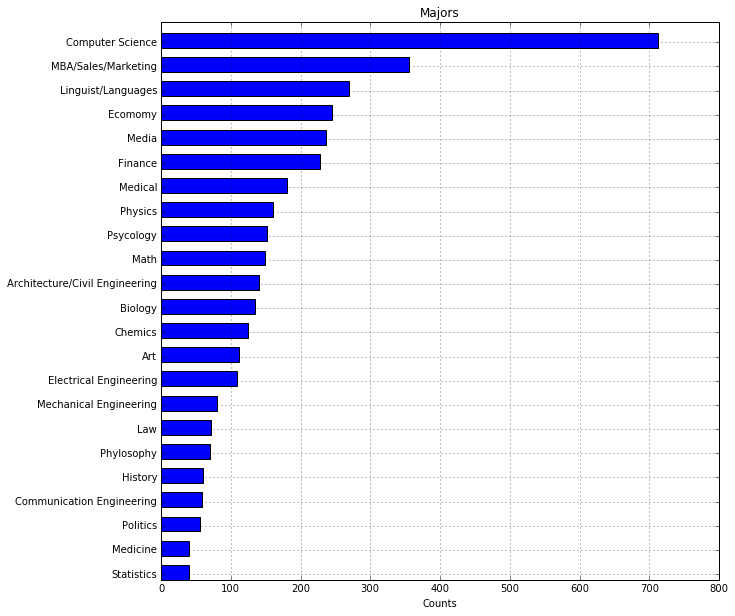

In [18]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
pos = arange(23)*1.3
plt.figure(figsize=(10,10))
plt.barh(pos, value, align='edge')

plt.yticks(pos+0.3,name)
xlabel('Counts')
title(u'Majors')
grid(True)



In [20]:
# 性别比例
gender = full_data.groupby(['gender']).count()

In [21]:
name = []
value = []
for i in gender.index:
    name.append(i)
    value.append(int(gender.loc[i]['_id']))

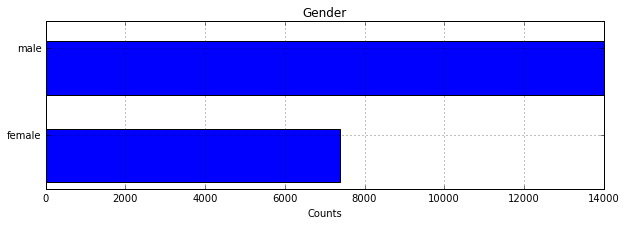

In [22]:
pos = arange(2)*1.3
plt.figure(figsize=(10,3))
plt.barh(pos, value, align='center')

plt.yticks(pos+0.3,name)
xlabel('Counts')
title('Gender')
grid(True)

In [24]:
# 教育背景
edu = full_data.groupby(['education']).count().sort(['_id'],ascending= False)

In [25]:
name=[]
value=[]
for i in edu.index:
    name.append(str(i))
    value.append(int(edu.loc[i]['_id']))

In [26]:
# only pick top 20
name = name[:20]
value = value[:20]

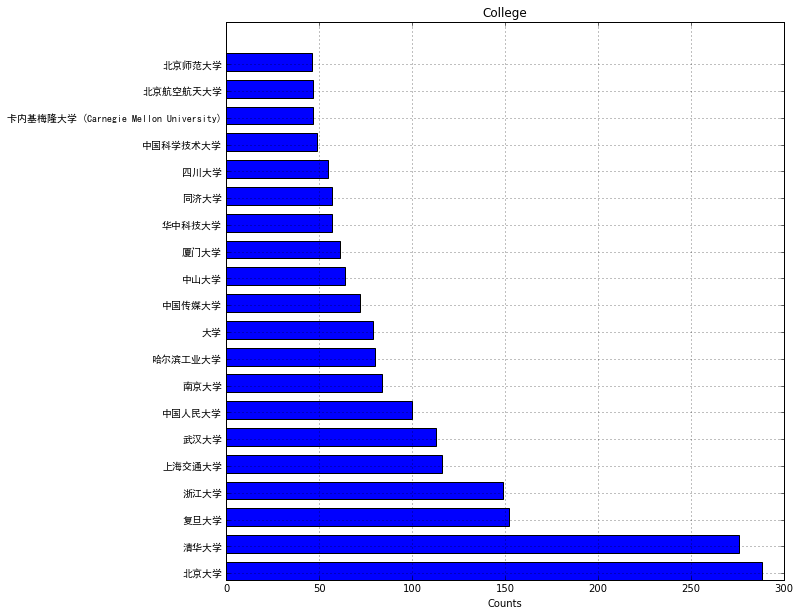

In [27]:
from matplotlib.font_manager import FontProperties
ChineseFont1 = FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc')
ChineseFont2 = FontProperties('SimHei')
pos = arange(20)
plt.figure(figsize=(10,10))
plt.barh(pos*1.2, value, align='edge')
plt.yticks(pos*1.2+0.3,name,fontproperties = ChineseFont2)
xlabel('Counts')
title('College')
grid(True)

In [254]:
# 职称
title = full_data.groupby(['position']).count().sort(['_id'],ascending= False)

In [257]:
# 公司
company = title = full_data.groupby(['employment']).count().sort(['_id'],ascending= False)